### Capstone Project Report: 
# House Prices: Advanced Regression Techniques
Data is aquired from Kaggle. https://www.kaggle.com/c/house-prices-advanced-regression-techniques

##  Outline:
#### This capstone project report includes the following sections
#### 1. Data Introduction
#### 2. Data Importing and Cleaning
#### 3. Data Study
#### 4. Modeling

## 1. Data Introduction
Data is aquired from a competition on Kaggle. https://www.kaggle.com/c/house-prices-advanced-regression-techniques
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges competitors to predict the final price of each home.

## 2. Data Importing and Cleaning

### Read in the training dataset of house pricing, and take a brief look of the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pprint
import scipy.stats as stats

%matplotlib inline


df = pd.read_csv('train.csv')
 


## Looking for missing data

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [49]:
df = df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],1)
df = df.fillna(0)
print(df.info())            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

#### There are several columns have too many Null values, so they don't have statistical value for us. These features will be removed from the dataset for better statistical analysis.
- 'Alley':            91 non-null object
- 'PoolQC':           7  non-null object
- 'MiscFeature':      54 non-null object
- 'FireplaceQu':      770 non-null object
- 'Fence':            281 non-null object
##### (Their corelations with SalePrice is boxploted in the below)



#### Fill the null values in the remaining features with 0.

### Data Overview 

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


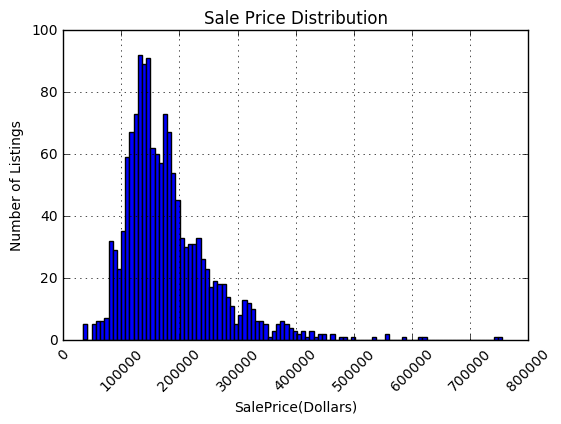

In [5]:
ax = df['SalePrice'].hist(bins=100)
# ax.set_ylabel('Number of Passengers')
plt.xticks(rotation=45)
ax.set_xlabel('SalePrice(Dollars)')
ax.set_ylabel('Number of Listings')
ax.set_title('Sale Price Distribution')
pd.DataFrame(df['SalePrice'].describe())


Figure description  and insight 

SalePrice
Alley                    
Grvl  mean  122219.080000
      std    34780.780734
Pave  mean  168000.585366
      std    38370.375243

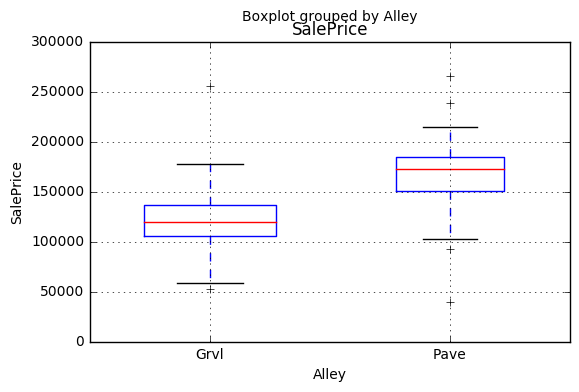

In [9]:
fig1 = plt.figure()
sizes_alley = df.groupby('Alley').count().Id
sizes_alley = sizes_alley/sum(sizes_alley).tolist()
df.boxplot(column=['SalePrice'],by = 'Alley',widths = sizes_alley)
plt.ylabel('SalePrice')
pd.DataFrame(df.groupby( ['Alley'])['SalePrice'].describe().loc[:,['mean','std']])

Figure description  and insight 

SalePrice
PoolQC                    
Ex     mean  490000.000000
       std   360624.458405
Fa     mean  215500.000000
       std    48790.367902
Gd     mean  201990.000000
       std    63441.392639

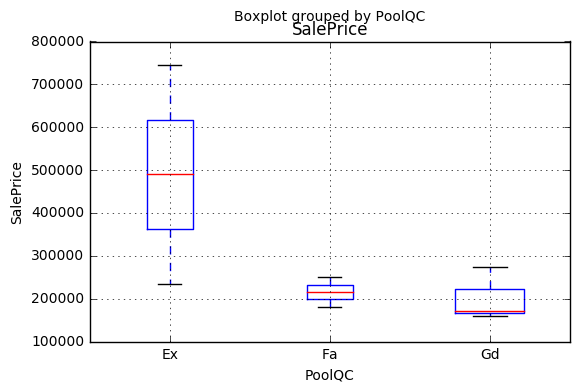

In [10]:
fig2 = plt.figure()
sizes_poolqc = df.groupby('PoolQC').count().Id
sizes_poolqc = sizes_poolqc/sum(sizes_poolqc).tolist()
df.boxplot(column=['SalePrice'],by = 'PoolQC',widths = sizes_poolqc)
plt.ylabel('SalePrice')
pd.DataFrame(df.groupby( ['PoolQC'])['SalePrice'].describe().loc[:,['mean','std']])

Figure description  and insight 

SalePrice
MiscFeature                    
Gar2        mean  170750.000000
            std    27223.611076
Othr        mean   94000.000000
            std    55154.328933
Shed        mean  151187.612245
            std    51642.728056
TenC        mean  250000.000000
            std             NaN

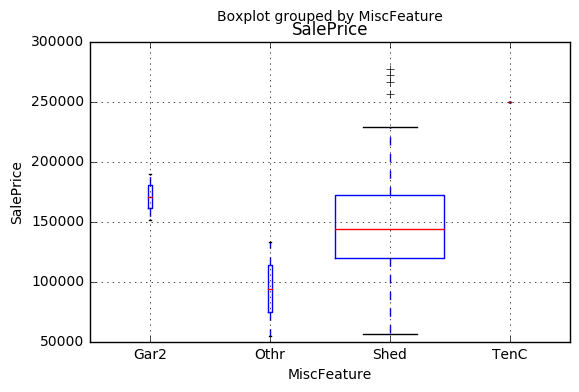

In [11]:
fig3 = plt.figure()
sizes_3 = df.groupby('MiscFeature').count().Id
sizes_3 = sizes_3/sum(sizes_3).tolist()
df.boxplot(column=['SalePrice'],by = 'MiscFeature',widths = sizes_3)
plt.ylabel('SalePrice')
pd.DataFrame(df.groupby( ['MiscFeature'])['SalePrice'].describe().loc[:,['mean','std']])

Figure description  and insight 

SalePrice
FireplaceQu                    
Ex          mean  337712.500000
            std   123611.471764
Fa          mean  167298.484848
            std    34287.717564
Gd          mean  226351.415789
            std    91123.148369
Po          mean  129764.150000
            std    31080.842115
TA          mean  205723.488818
            std    71367.028772

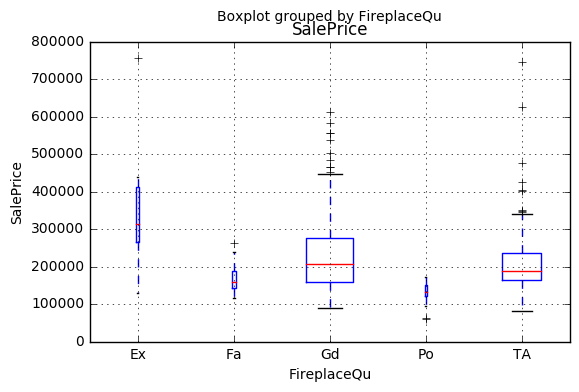

In [12]:

fig4 = plt.figure()
sizes_4 = df.groupby('FireplaceQu').count().Id
sizes_4 = sizes_4/sum(sizes_4).tolist()
df.boxplot(column=['SalePrice'],by = 'FireplaceQu',widths = sizes_4)
plt.ylabel('SalePrice')
pd.DataFrame(df.groupby( ['FireplaceQu'])['SalePrice'].describe().loc[:,['mean','std']])

Figure description  and insight 

SalePrice
Fence                    
GdPrv mean  178927.457627
      std    56757.237563
GdWo  mean  140379.314815
      std    53592.585059
MnPrv mean  148751.089172
      std    66096.069463
MnWw  mean  134286.363636
      std    21781.805376

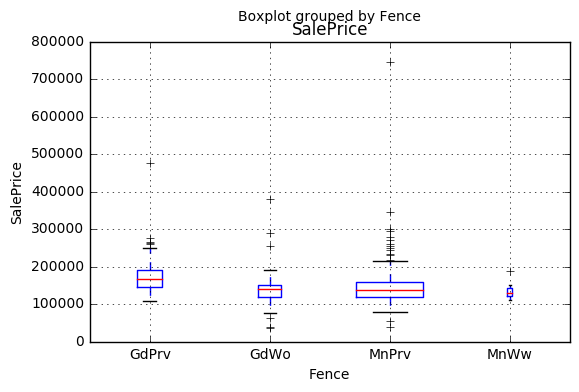

In [13]:
 
fig5 = plt.figure()
sizes_5 = df.groupby('Fence').count().Id
sizes_5 = sizes_5/sum(sizes_5).tolist()
df.boxplot(column=['SalePrice'],by = 'Fence',widths = sizes_5)
plt.ylabel('SalePrice')
pd.DataFrame(df.groupby( ['Fence'])['SalePrice'].describe().loc[:,['mean','std']])

Figure description  and insight 

## 3. Data Study
### Before we study the correlation between all the house features and house price, we need to find out the features that are highly correlated to each other, and have only one of the correlated features remain in the dataset. So that correlated features do not REPEATINGLY contribute to the price modeling. 
#### By 

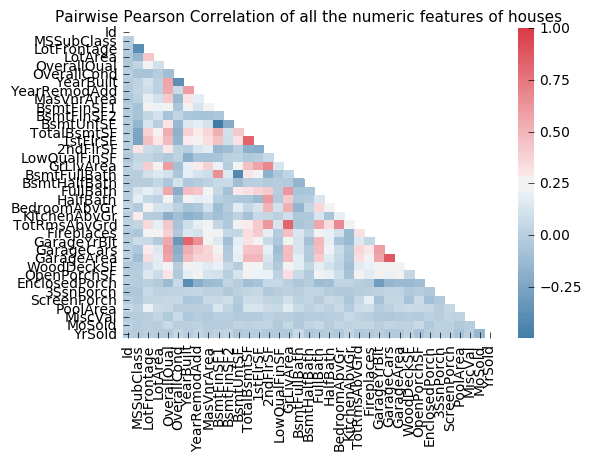

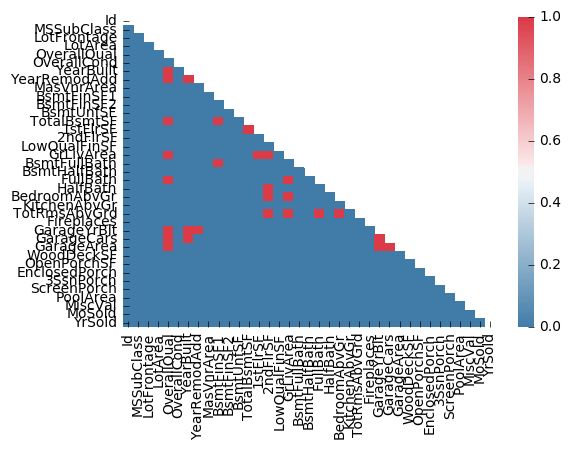

In [60]:
import seaborn as sns

df_no_SP = df.drop('SalePrice',axis=1)
corr_all = df_no_SP.corr()

# corr_all = df.corr()

# Thresholding the correlations larger than 0.5 (or-0.5) 
corr_all_true = corr_all>0.5

corr_dict = {}
for column in corr_all_true:
    corr_list = corr_all_true[column][corr_all_true[column]==True].index.tolist()
    corr_dict[column] = corr_list

# pprint.pprint(corr_dict)

# create custom color map
cmap = sns.diverging_palette(240, 10, as_cmap=True)
fig1 = plt.figure()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all, mask=mask, cmap=cmap,
          xticklabels=corr_all.columns.values,
          yticklabels=corr_all.columns.values)
plt.title('Pairwise Pearson Correlation of all the numeric features of houses',fontsize=11)


fig2 = plt.figure()
sns.heatmap(corr_all_true, mask=mask,cmap=cmap,
          xticklabels=corr_all.columns.values,
          yticklabels=corr_all.columns.values)


creating another correlation overview with only the relevant features that included in the model. 